# Absorption and scattering at 785nm and 976nm for the UCNPS &rarr;
 
To account for the scattering contribution of the laser and emitted light, narrow band measurements (using 785 and 976nm lasers) and a wide band measurement (using white light) were performed.

**Author: Jean Matias \
UCNP Sample: s013 \
Acquired on: 2021/05/09 \
Analysed on: 2021/05/11**


In [1]:
%matplotlib notebook
import numpy as np
import scipy.optimize as sciopt
import pandas as pd
import matplotlib.pyplot as pl
import sys
sys.path.append('../scripts/')
from lab import Sample, Analysis
from calibration import *

For details on the analysis protocol and calculation:
>>> help(Analysis)
>>> help(Sample)


In [3]:
help(Analysis)

Help on class Analysis in module lab:

class Analysis(builtins.object)
 |  Analysis(dataPath='../data/raw-data/')
 |  
 |  Creates and handle different Samples.
 |  Ex.:
 |  >>> exp = Analysis()
 |  >>> exp.loaddata(
 |      sampleType='dye',
 |      dataIds=['20201111-101010'],
 |      diluterId='20201111-101110',
 |      emptyId='20201111-101200'
 |  )
 |  
 |  **Analysis protocol**:
 |      In order to get the quantum yield values for a ucnp sample, 
 |      the steps bellow should be followed for a reference dye data
 |      and subsequently for ucnps data. 
 |  
 |      1. Get steady data - it averages data points after the equipmment and samples stabilised. 
 |      2. Calibrate the power meter output (pm) - Volts to mW using standard curves for that.
 |          This is the transmitted power through the cuvette.
 |      3. Calibrate the DAQ output (trigger) - Volts to mW using empty measuremnts.
 |          This is the laser power, i.e. the power before reaching the cuvette.
 | 

In [5]:
help(Sample)

Help on class Sample in module lab:

class Sample(builtins.object)
 |  Sample(path, expId, sampleType)
 |  
 |  Creates an object to handle its data and all the information 
 |  related to its experiment.
 |  
 |  To initialise a sample object use the example:
 |  ```
 |  >>> ucnp = Sample('path/to/data', expId='20210101-101010', sampleType='ucnp')
 |  ```
 |  Sample type can be: ucnp, dye, empty, or diluter. It will define the rules of calculation
 |  for certain methods.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, path, expId, sampleType)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  absorbance(self, diluterAbsorbance=None, filterQuery='laser_power > 0', recalculate=False)
 |      Calculates absorbance of the emitter compound present on the aqueous medium.
 |      
 |      Args: 
 |          diluterAbsorbance (float): Diluter absorbance used as a reference to calculate the emitter's absorbance
 |          recalculate (bool): If True it wil

In [2]:
data785 = Analysis.datalog['exp_id'].str.contains('20210509') \
    & ~Analysis.datalog['saved_name'].isna() \
    & Analysis.datalog['extra_params'].str.contains('sample=(?:s013|water|empty).*=785') \
    
Analysis.datalog[data785]

,exp_id,saved_name,out_ch,range_start,range_end,range_step_size,step_reset,in_chs,time_per_step,samples_per_ch,sampling_rate,min_reading_val,max_reading_val,samples_per_ch_to_read,extra_params,user,app_version
715,20210509-120243,./data/raw-data/qy_20210509_120243.csv,ao0=Laser,0.0,1.678,0.01,False,ai0=Trigger/ai1=PM/ai2=APD/ai3=APDRaw,0.3,1000,3333.333333,0.0,10.0,READ_ALL_AVAILABLE,sample=s013/apd gain=min/density filter=0/spot...,jean.matias,QyApp-v1.1.0
716,20210509-120454,./data/raw-data/qy_20210509_120454.csv,ao0=Laser,0.0,1.678,0.01,False,ai0=Trigger/ai1=PM/ai2=APD/ai3=APDRaw,0.3,1000,3333.333333,0.0,10.0,READ_ALL_AVAILABLE,sample=empty/apd gain=min/density filter=0/spo...,jean.matias,QyApp-v1.1.0
717,20210509-120639,./data/raw-data/qy_20210509_120639.csv,ao0=Laser,0.0,1.678,0.01,False,ai0=Trigger/ai1=PM/ai2=APD/ai3=APDRaw,0.3,1000,3333.333333,0.0,10.0,READ_ALL_AVAILABLE,sample=water/apd gain=min/density filter=0/spo...,jean.matias,QyApp-v1.1.0
718,20210509-121126,./data/raw-data/qy_20210509_121126.csv,ao0=Laser,0.0,1.678,0.01,False,ai0=Trigger/ai1=PM/ai2=APD/ai3=APDRaw,0.3,1000,3333.333333,0.0,10.0,READ_ALL_AVAILABLE,sample=s013/apd gain=min/density filter=0/spot...,jean.matias,QyApp-v1.1.0


In [3]:
data976 = Analysis.datalog['exp_id'].str.contains('20210509') \
    & ~Analysis.datalog['saved_name'].isna() \
    & Analysis.datalog['extra_params'].str.contains('sample=(?:s013|water|empty).*=976') \
    
Analysis.datalog[data976]

,exp_id,saved_name,out_ch,range_start,range_end,range_step_size,step_reset,in_chs,time_per_step,samples_per_ch,sampling_rate,min_reading_val,max_reading_val,samples_per_ch_to_read,extra_params,user,app_version
706,20210509-113829,./data/raw-data/qy_20210509_113829.csv,ao0=Laser,0.0,5.4,0.08,False,ai0=Trigger/ai1=PM/ai2=APD/ai3=APDRaw,0.3,1000,3333.333333,0.0,10.0,READ_ALL_AVAILABLE,sample=s013/apd gain=min/density filter=0/spot...,jean.matias,QyApp-v1.1.0
707,20210509-114034,./data/raw-data/qy_20210509_114034.csv,ao0=Laser,0.0,5.4,0.08,False,ai0=Trigger/ai1=PM/ai2=APD/ai3=APDRaw,0.3,1000,3333.333333,0.0,10.0,READ_ALL_AVAILABLE,sample=empty/apd gain=min/density filter=0/spo...,jean.matias,QyApp-v1.1.0
708,20210509-114356,./data/raw-data/qy_20210509_114356.csv,ao0=Laser,0.0,5.4,0.08,False,ai0=Trigger/ai1=PM/ai2=APD/ai3=APDRaw,0.3,1000,3333.333333,0.0,10.0,READ_ALL_AVAILABLE,sample=water/apd gain=min/density filter=0/spo...,jean.matias,QyApp-v1.1.0
711,20210509-115513,./data/raw-data/qy_20210509_115513.csv,ao0=Laser,0.0,5.4,0.08,False,ai0=Trigger/ai1=PM/ai2=APD/ai3=APDRaw,0.3,1000,3333.333333,0.0,10.0,READ_ALL_AVAILABLE,sample=water/apd gain=min/density filter=0/spo...,jean.matias,QyApp-v1.1.0
712,20210509-115628,./data/raw-data/qy_20210509_115628.csv,ao0=Laser,0.0,5.4,0.08,False,ai0=Trigger/ai1=PM/ai2=APD/ai3=APDRaw,0.3,1000,3333.333333,0.0,10.0,READ_ALL_AVAILABLE,sample=empty/apd gain=min/density filter=0/spo...,jean.matias,QyApp-v1.1.0
713,20210509-115805,./data/raw-data/qy_20210509_115805.csv,ao0=Laser,0.0,5.4,0.08,False,ai0=Trigger/ai1=PM/ai2=APD/ai3=APDRaw,0.3,1000,3333.333333,0.0,10.0,READ_ALL_AVAILABLE,sample=s013/apd gain=min/density filter=0/spot...,jean.matias,QyApp-v1.1.0


### Select ucnp data

In [4]:
uData = Analysis()

In [6]:
# 785
uData.loaddata('ucnp', dataIds='20210509-121126', diluterId='20210509-120639', emptyId='20210509-120454')
# 976
uData.loaddata('ucnp', dataIds='20210509-115805', diluterId='20210509-115513', emptyId='20210509-115628')

In [7]:
uData.details()

,exp_id,type,sample,apd_gain,comments,density_filter,laser_wavelength,power_meter_range,range_start,range_end,range_step_size,samples_per_ch,sampling_rate,time_per_step
0,20210509-120454,empty,empty,min,-,0,785,91mW,0.0,1.678,0.01,1000.0,3333.333333,0.3
1,20210509-120639,diluter,water,min,-,0,785,91mW,0.0,1.678,0.01,1000.0,3333.333333,0.3
2,20210509-121126,ucnp,s013,min,on the previous I havent placed the 785 filter...,0,785,91mW,0.0,1.678,0.01,1000.0,3333.333333,0.3
3,20210509-115628,empty,empty,min,-,0,976nm,600mW,0.0,5.400,0.08,1000.0,3333.333333,0.3
4,20210509-115513,diluter,water,min,-,0,976nm,600mW,0.0,5.400,0.08,1000.0,3333.333333,0.3
5,20210509-115805,ucnp,s013,min,-,0,976nm,600mW,0.0,5.400,0.08,1000.0,3333.333333,0.3


<IPython.core.display.Javascript object>


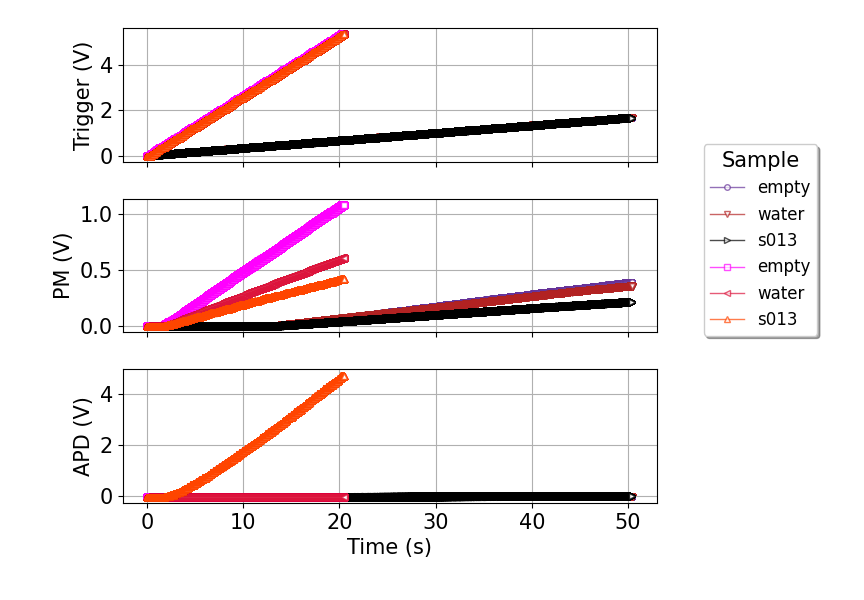

(<Figure size 640x480 with 3 Axes>,
 array([<AxesSubplot:ylabel='Trigger (V)'>, <AxesSubplot:ylabel='PM (V)'>,
        <AxesSubplot:xlabel='Time (s)', ylabel='APD (V)'>], dtype=object))

In [8]:
uData.view(includeDiluter=True, includeEmpty=True, label='sample')

### Get Steady Data

In [9]:
uData.get('steadydata', dict(fromPt=500, toPt=1000), includeEmpty=True, includeDiluter=True) # ucnps


20210509-120454: empty - Success!
20210509-120639: diluter - Success!
20210509-121126: ucnp - Success!
20210509-115628: empty - Success!
20210509-115513: diluter - Success!
20210509-115805: ucnp - Success!


In [10]:
uData.get('removebackground', dict(channel='apd', baseline='trigger < 0.2'), includeEmpty=True, includeDiluter=True)

20210509-120454: empty - Success!
20210509-120639: diluter - Success!
20210509-121126: ucnp - Success!
20210509-115628: empty - Success!
20210509-115513: diluter - Success!
20210509-115805: ucnp - Success!


In [11]:
uData.get('removebackground', dict(channel='pm', baseline='trigger < 0.2'), includeEmpty=True, includeDiluter=True)

20210509-120454: empty - Success!
20210509-120639: diluter - Success!
20210509-121126: ucnp - Success!
20210509-115628: empty - Success!
20210509-115513: diluter - Success!
20210509-115805: ucnp - Success!


<IPython.core.display.Javascript object>


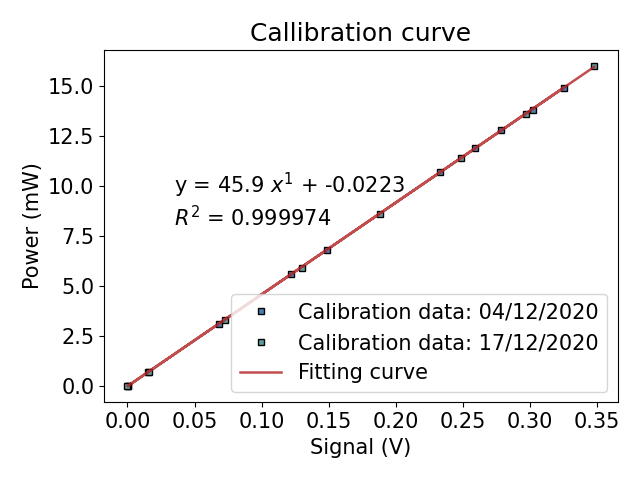

In [12]:
coeffs, r_val = calibratePM(laser=785, pmRange=91, degree=1)
calibfunc = lambda x: coeffs[0] * x + coeffs[1]

In [13]:
# calibrate ucnps, empty and water
uData.get('calibrate', dict(calibFunction=calibfunc, channel='pm'), which=[0,1,2])

20210509-120454: empty - Success!
20210509-120639: diluter - Success!
20210509-121126: ucnp - Success!


<IPython.core.display.Javascript object>


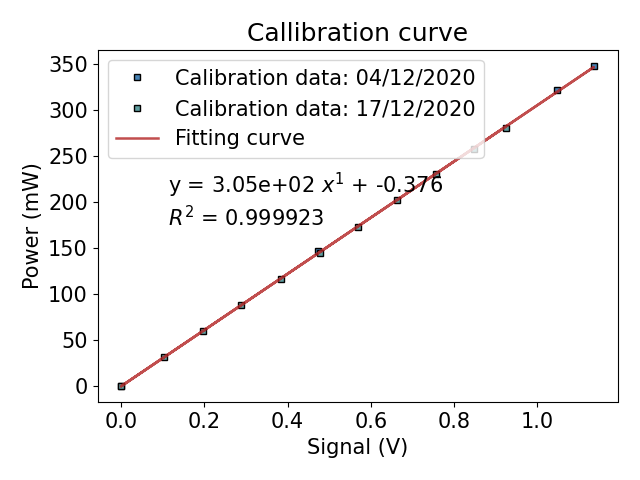

In [14]:
coeffs, r_val = calibratePM(laser=976, pmRange=600, degree=1)
calibfunc = lambda x: coeffs[0] * x + coeffs[1]

In [15]:
# calibrate ucnps, empty and water
uData.get('calibrate', dict(calibFunction=calibfunc, channel='pm'), which=[3,4,5])

20210509-115628: empty - Success!
20210509-115513: diluter - Success!
20210509-115805: ucnp - Success!


<IPython.core.display.Javascript object>


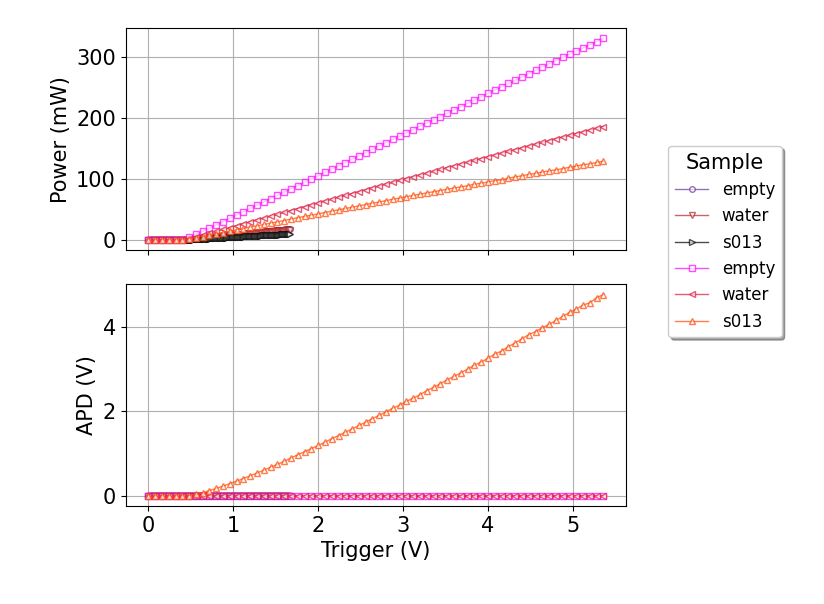

In [16]:
fig, axs = uData.view(x='trigger', yList=['transmitted_power', 'apd'], label='sample', includeDiluter=True, includeEmpty=True)

## Fit trigger vs Power for empty cuvette

<IPython.core.display.Javascript object>


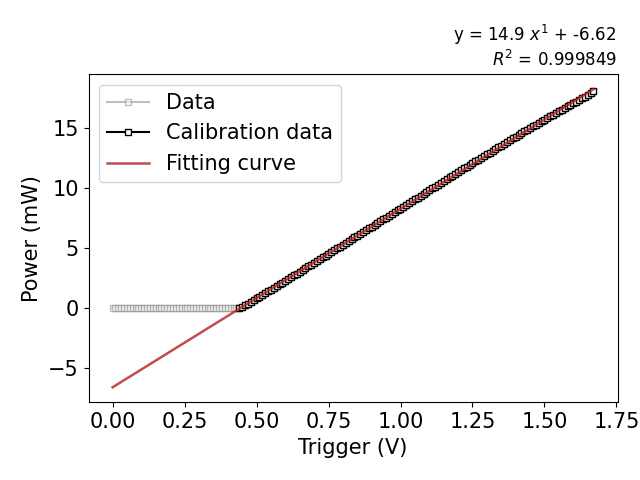

In [17]:
coeffs, r_val = uData.sample(0).polyfit('trigger', 'transmitted_power', 1, 'x>0.44', show=True)
fitting = lambda x: coeffs[0] * x + coeffs[1]

In [18]:
# calibrate ucnps, empty and water
uData.get('calibrate', dict(calibFunction=fitting, channel='trigger', recalculate=True), which=[0,1,2])

20210509-120454: empty - Success!
20210509-120639: diluter - Success!
20210509-121126: ucnp - Success!


<IPython.core.display.Javascript object>


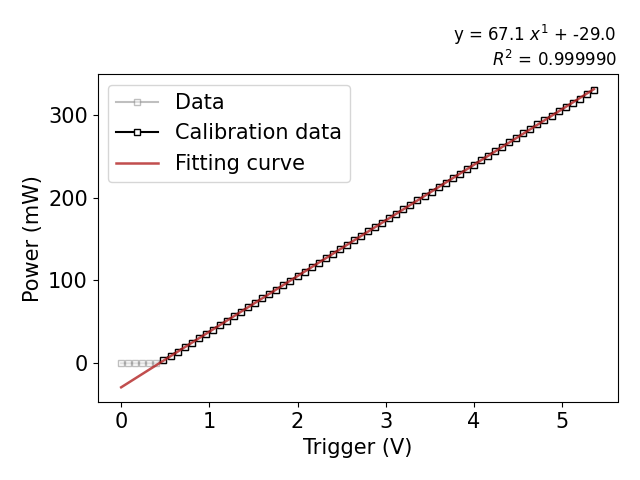

In [19]:
coeffs, r_val = uData.sample(3).polyfit('trigger', 'transmitted_power', 1, 'x>0.44', show=True)
fitting = lambda x: coeffs[0] * x + coeffs[1]

In [20]:
# calibrate ucnps, empty and water
uData.get('calibrate', dict(calibFunction=fitting, channel='trigger', recalculate=True), which=[3,4,5])

20210509-115628: empty - Success!
20210509-115513: diluter - Success!
20210509-115805: ucnp - Success!


In [21]:
uData.get('poweratcentre', dict(recalculate=True), includeDiluter=True, includeEmpty=True)

20210509-120454: empty - Success!
20210509-120639: diluter - Success!
20210509-121126: ucnp - Success!
20210509-115628: empty - Success!
20210509-115513: diluter - Success!
20210509-115805: ucnp - Success!


<IPython.core.display.Javascript object>


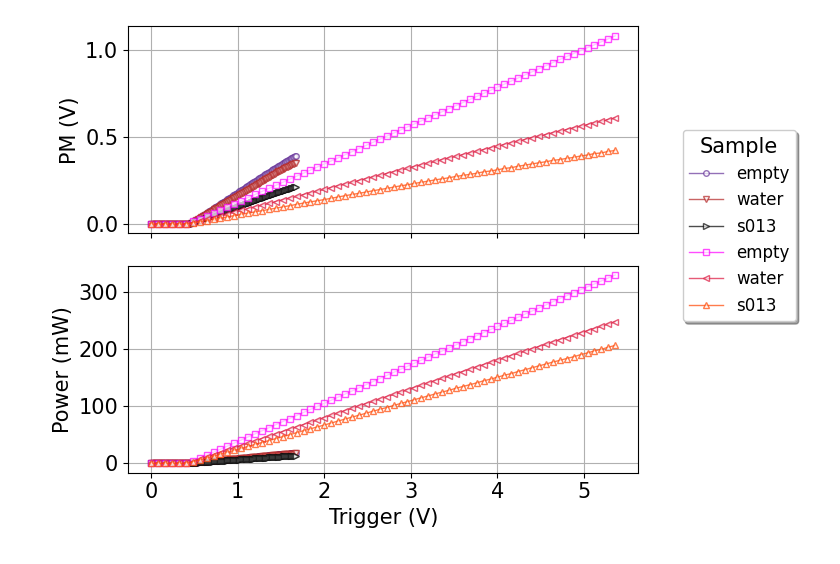

In [25]:
fig, axs = uData.view(x='trigger', yList=['pm', 'power_at_centre'], label='sample', includeDiluter=True, includeEmpty=True)

## Absorbance

In [26]:
uData.get('sampleabsorbance', dict(recalculate=True), includeDiluter=True)

20210509-120639: diluter - Success!
20210509-121126: ucnp - Success!
20210509-115513: diluter - Success!
20210509-115805: ucnp - Success!


In [27]:
 _, abMean1, abStd1, _ = uData.sample(1).sampleabsorbance(filterQuery='trigger > 0.65', recalculate=True)
print(f'{uData.sample(1)._sampleType}: {abMean1=}, {abStd1=}')

diluter: abMean1=0.1047233125651863, abStd1=0.0060207652002441485


In [28]:
 _, abMean4, abStd4, _ = uData.sample(4).sampleabsorbance(filterQuery='trigger > 0.65', recalculate=True)
print(f'{uData.sample(4)._sampleType}: {abMean4=}, {abStd4=}')

diluter: abMean4=0.5622188515380618, abStd4=0.008042325293936925


In [29]:
uData.get('absorbance', dict(recalculate=True), includeDiluter=True)

20210509-120639: diluter - Success!
20210509-121126: ucnp - Success!
20210509-115513: diluter - Success!
20210509-115805: ucnp - Success!


<IPython.core.display.Javascript object>


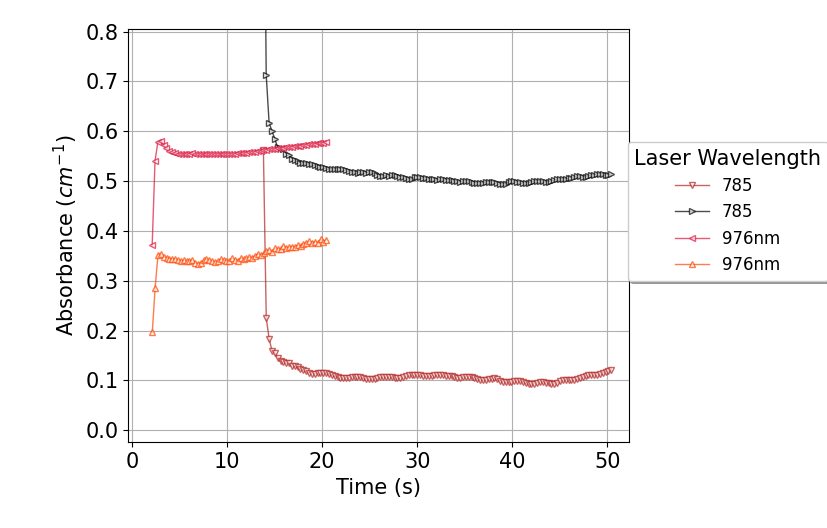

In [31]:
fig, axs = uData.view(x='time', yList=['absorbance'], label='laser_wavelength', includeDiluter=True)

In [32]:
_, absAvg785, absStd785, msg = uData.sample(2).absorbance(filterQuery='time > 20', recalculate=True)
_, absAvg976, absStd976, msg = uData.sample(5).absorbance(filterQuery='time > 5.4', recalculate=True)
print(f'Absorption + Scaterring at 785nm = {absAvg785:.3f} ({absStd785:.3f})')
print(f'Absorption + Scaterring at 976nm = {absAvg976:.3f} ({absStd976:.3f})')

Absorption + Scaterring at 785nm = 0.507 (0.009)
Absorption + Scaterring at 976nm = 0.355 (0.015)


# Scattering 
White light was used with an Ocean Optics spectrometre

In [39]:
dataPath = '../data/scattering/'
fileName = 'ucnp_end.dat'
data = pd.read_csv(dataPath + fileName, header=None, names=['Wavelength', 'Transmission'], sep='\t')


In [40]:
data

,Wavelength,Transmission
0,345.786,0.199129
1,346.573,1.035874
2,347.359,0.469517
3,348.146,1.104152
4,348.933,1.405386
...,...,...
1039,1123.340,0.501121
1040,1124.047,0.955757
1041,1124.754,0.358634
1042,1125.460,0.391822


### Scaterring and absorption
Calculating scattering and confirming it with 785nm measurements. 

With the results, the scattering contribution can subtracted from the QY system measurements

In [35]:
def scatmodel(l, mu0, l0, b):
    '''scatmodel returns absorption + scaterring as a function of the wavelegth
    
    Args:
        l: lambda represents the wavelength
        mu0: mu at l0
        l0: standard wavelength
        b: scattering coeff
    '''
    return(mu0 * (l/l0)**b)

In [41]:
data.iloc[(data['Wavelength']-785).abs().argsort()[:2]]

,Wavelength,Transmission
573,784.929,0.521795
574,785.674,0.520778


<IPython.core.display.Javascript object>


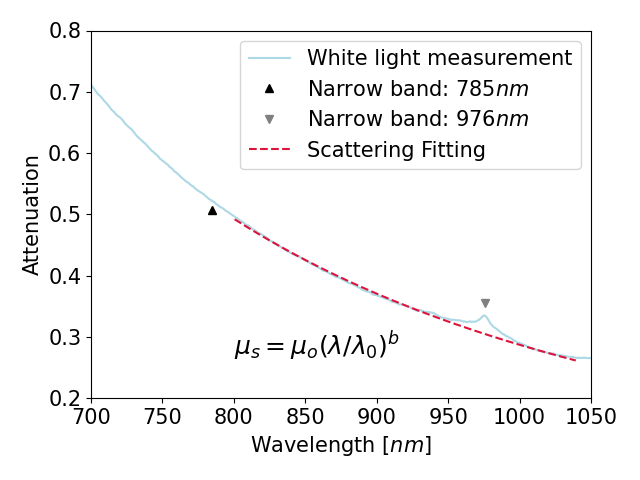

Text(0.5, 0, 'Wavelength [$nm$]')

In [62]:
fittingRange = [(800, 900), (1000, 1040)]

mask = (800 < data['Wavelength']) & (900 > data['Wavelength']) | (1000 < data['Wavelength']) & (1040 > data['Wavelength'])
coeffs, pcov = sciopt.curve_fit(
    scatmodel,
    data.loc[mask, 'Wavelength'],
    data.loc[mask, 'Transmission'],
    bounds=([2, 400, -3], [20, 500, 0])
)

mask = (800 < data['Wavelength']) & (1040 > data['Wavelength'])
pl.plot(data['Wavelength'], data['Transmission'],color='lightblue', label='White light measurement')
pl.plot([785], [absAvg785], '^', color='k', label=r'Narrow band: $785nm$')
pl.plot([976], [absAvg976], 'v', color='gray', label=r'Narrow band: $976nm$')
pl.plot(data.loc[mask, 'Wavelength'], scatmodel(data.loc[mask, 'Wavelength'], *coeffs), '--', color='crimson', label='Scattering Fitting')

pl.text(800, 0.27, r'$\mu_{s}=\mu_o (\lambda / \lambda_0)^b$', fontsize=18)
pl.xlim([700, 1050])
pl.ylim([0.2, 0.8])
pl.legend()
pl.ylabel('Attenuation')
pl.xlabel('Wavelength [$nm$]')


In [63]:
pl.tight_layout()

In [53]:
coeffs

array([  2.58642179, 403.25992973,  -2.42018584])

<IPython.core.display.Javascript object>


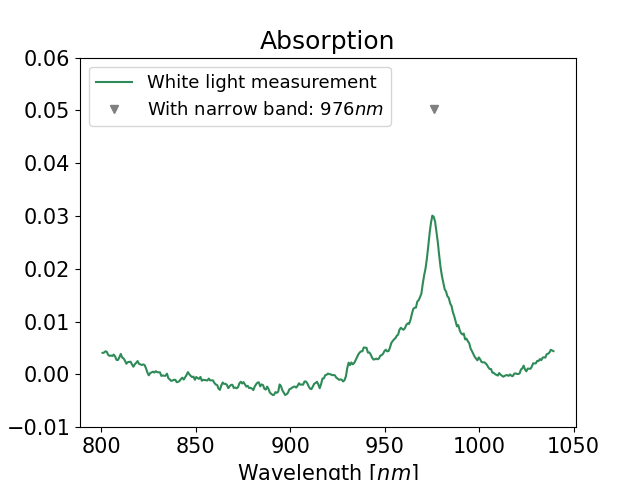

Text(0.5, 1.0, 'Absorption')

In [55]:
pl.plot(data.loc[mask, 'Wavelength'], data.loc[mask, 'Transmission'] - scatmodel(data.loc[mask, 'Wavelength'], *coeffs), '-', color='seagreen', label='White light measurement')
pl.plot([976], [absAvg976 - scatmodel(976, *coeffs)], 'v', color='gray', label=r'With narrow band: $976nm$')

pl.ylim([-0.01,0.06])
pl.legend(loc='upper left', fontsize=13)
pl.ylabel('Absorption $[cm^{-1}]$')
pl.xlabel('Wavelength $[nm]$')
pl.title('Absorption')


In [101]:
pl.tight_layout()

In [56]:
absAvg976 - scatmodel(976, *coeffs)

0.05024376081714654

In [57]:
uData.get('powdensatcentre', dict(recalculate=True, beamWidth=0.0106), which=[4,5])

20210509-115513: diluter - Success!
20210509-115805: ucnp - Success!


<IPython.core.display.Javascript object>


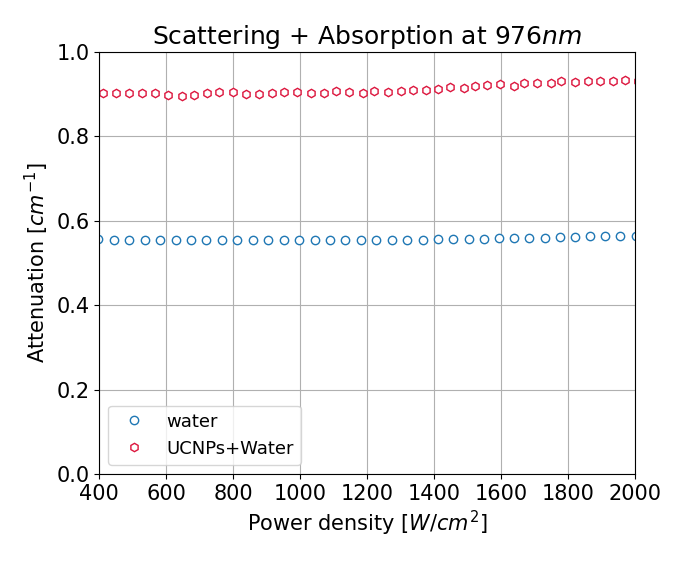

Text(0.5, 1.0, 'Scattering + Absorption at $976nm$')

In [59]:

pl.plot(uData.sample(4).data()['pow_dens_at_centre'], uData.sample(4).data()['sample_absorbance'], 'o', mfc='w', label='water')
pl.plot(uData.sample(5).data()['pow_dens_at_centre'], uData.sample(5).data()['sample_absorbance'], 'h', color='crimson', mfc='w', label='UCNPs+Water')

pl.ylim([0, 1])
pl.xlim([400, 2000])
pl.grid()
pl.legend(loc='best', fontsize=13)
pl.ylabel('Attenuation $[cm^{-1}]$')
pl.xlabel('Power density $[W/cm^2]$')
pl.title(r'Scattering + Absorption at $976nm$')


In [61]:
pl.tight_layout()